## Task 4: Churn Prediction Model
### Objective:
To move from analysis to action, I am building a Predictive Model. This Machine Learning model uses historical data to predict whether a specific customer is likely to churn in the future.

### Methodology:
* **Algorithm:** Logistic Regression (ideal for binary classification).
* **Evaluation:** Using Accuracy and a Confusion Matrix to measure the model's reliability.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import io

# Step 1: Upload the file from your local machine
df= print("Please upload 'Telco_Customer_Churn_Dataset .csv'")
uploaded = files.upload()

# Correctly load the dataframe from the uploaded dictionary
if uploaded:
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print("File uploaded successfully.")
    display(df.head())
else:
    print("No file uploaded. Please run the cell again and select a file.")

Please upload 'Telco_Customer_Churn_Dataset .csv'


Saving Telco_Customer_Churn_Dataset .csv to Telco_Customer_Churn_Dataset .csv
File uploaded successfully.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 82.19%

Detailed Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



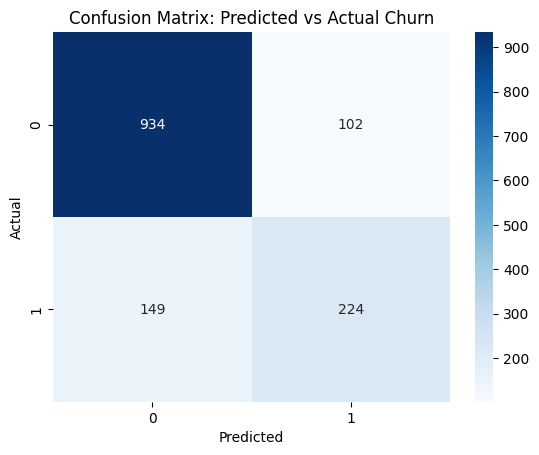

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Convert text columns to numbers (One-Hot Encoding)
df_model = df.drop('customerID', axis=1)
df_model = pd.get_dummies(df_model, drop_first=True)

# 3. Split data (80% for training, 20% for testing)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix Visualization (Task 6 Requirement)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()